1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

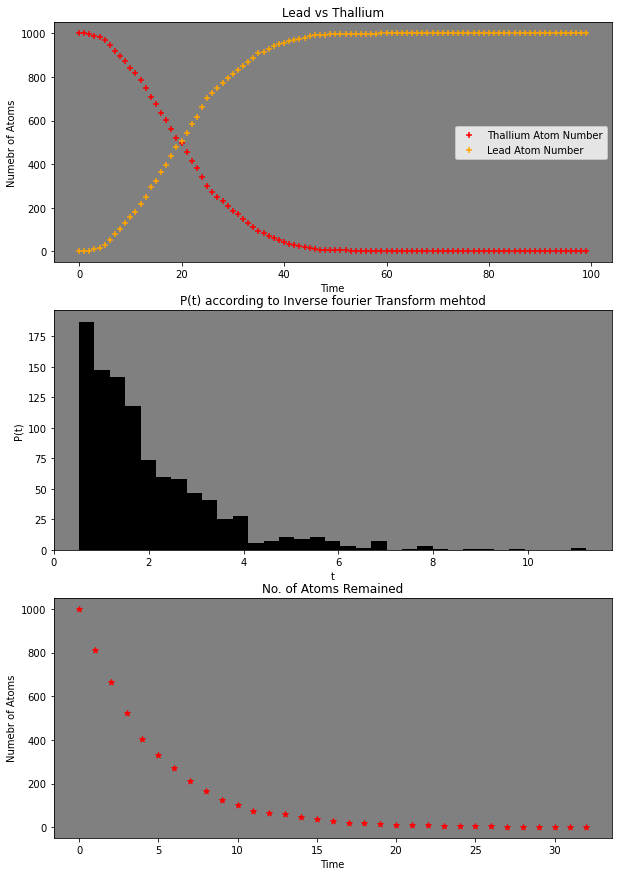

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
from scipy import integrate
import math

npr.seed(2344)

def Decay_prob(t):
    return 1- 2**(-t/theta)

Thall_Nu= 1000  #The initial value 
Lead_Nu= 0      #The initial value
T=100
theta= 3.052* 60

Thall_Nu_list=[]
Lead_Nu_list=[]

for t in range(T):
    Thall_Nu_list.append(Thall_Nu)
    Lead_Nu_list.append(Lead_Nu)

    for i in range(Thall_Nu):
        temp = npr.rand()
        if temp< Decay_prob(t):
            Thall_Nu -=1
            Lead_Nu +=1
        
Time_List=[t for t in range(T)]

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(10, 15))
ax1.scatter(Time_List, Thall_Nu_list, label= 'Thallium Atom Number', color= 'r', marker = '+')
ax1.scatter(Time_List, Lead_Nu_list, label= 'Lead Atom Number', color= 'orange', marker = '+')
ax1.set_ylabel("Numebr of Atoms")
ax1.set_title("Lead vs Thallium")
ax1.set_xlabel("Time")
ax1.legend(loc='best')
ax1.set_facecolor("gray")


def t_inverse_fun(z):
    return math.log2(z*np.log(2))   #Obtained through Calculations

t_list = np.abs(np.array([t_inverse_fun(npr.rand()) for i in range(1000)]))
P, edges,_= ax2.hist(t_list, bins='auto', color= 'black')
ax2.set_ylabel("P(t)")
ax2.set_title("P(t) according to Inverse fourier Transform mehtod")
ax2.set_xlabel("t") 
ax2.set_facecolor("gray")

bin_centers = 0.5 * (edges[:-1] + edges[1:])


N_remained_per_t=[]
N_remained=1000
for k in range(len(list(bin_centers))):
    N_remained_per_t.append(N_remained)
    N_remained-= P[k]
Time_List=[i for i in range(len(list(bin_centers)))]


ax3.scatter(Time_List, N_remained_per_t, color= 'r', marker = '*')
ax3.set_ylabel("Numebr of Atoms")
ax3.set_title("No. of Atoms Remained")
ax3.set_xlabel("Time") 
ax3.set_facecolor("gray")

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

The b should be smaller than: 1.8416949161882478e-05
The values for b conditonin dont lead to correct range for parameter x so the constaint on b cannot be applied


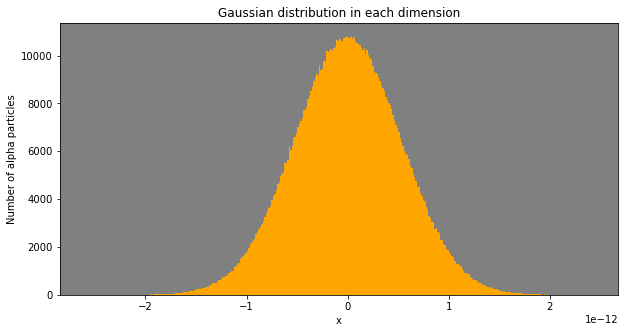

In [2]:
#we should write b in terms of other parameters

a0= 5.29177210903*(10**-11)
epsilon=8.8541878128*(10**-12)
e= 1.60217662 * (10**-19)
E= 7.7 * 1.60218 * (10**-22)
Z= 79
sigma = a0/100

max_b_value = (Z * (e**2))/(2*np.pi*epsilon*E*np.tan(np.pi/3.1))
# b is the distance form center in the guassian distribution

print("The b should be smaller than:", max_b_value)
#According to calculation b< 2.9547261896217647e-05

x= npr.normal(0,sigma,1000000)
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(x, color= 'orange', bins='auto')
ax.set_ylabel("Number of alpha particles")
ax.set_title("Gaussian distribution in each dimension")
ax.set_xlabel("x") 
ax.set_facecolor("gray")

bounce_back_list = [i for i in list(x) if np.abs(i)< 2.9547261896217647e-05]
print("The values for b conditonin dont lead to correct range for parameter x so the constaint on b cannot be applied")

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [3]:
from scipy import integrate

def f(x):
    return np.sin(1/(x*(2-x)))**2

#Hit and Miss method

N=1000
#Since its a sin function the maximum value of the function is 1
inside_dots= 0 
for i in range(N):
    y_rand= npr.rand()
    x_rand= npr.uniform(0,2)
    if y_rand < f(x_rand): inside_dots += 1

Integral = (inside_dots/N) * (2*1)
result = integrate.quad(f, 0, 2)

print("Hit and Miss error using {} dots is {}".format(N,  np.abs(1- Integral/result[0])))

#Mean value method

sum=0
for i in range(N): 
    x_rand = npr.uniform(0,2)
    sum += f(x_rand)
    
Integral= (2-0) * sum/N
print("Mean Value error using {} dots is {}".format(N,  np.abs(1- Integral/result[0])))
print("It seems that Mean value method works better for this problem")

Hit and Miss error using 1000 dots is 0.006673439914693269
Mean Value error using 1000 dots is 0.0025206834276634282
It seems that Mean value method works better for this problem


<ipython-input-3-a614ca9424c9>:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result = integrate.quad(f, 0, 2)


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [4]:
#With Hit and miss monte carlo method we consider a 2d squre

N= 100000

inside_dots = 0
for i in range(N):
    x_rand = npr.uniform(-1, 1)
    y_rand = npr.uniform(-1, 1)
    if x_rand**2 + y_rand**2 < 1: inside_dots += 1

Integral = (inside_dots/N) * (2*2)
print("The circle integral:", Integral)
    
#Generalization to a 10D sphere
#we have 10 parameters

inside_dots = 0
for i in range(N):
    X= np.array([npr.uniform(-1, 1) for i in range(10)])   #array of all 10 variables
    if np.sum(X**2) < 1: 
        inside_dots += 1

Integral = (inside_dots/N) * (2**10)
print("The 10D sphere integral:", Integral)

The circle integral: 3.139
The 10D sphere integral: 2.32448


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [5]:
def f(x):
    return x**(-0.5)/(np.exp(x) + 1)
def w(x):
    return 1/(np.sqrt(x))

N=1000
result = integrate.quad(w, 0, 1)
w_integral = result[0]

sum=0
for i in range(N):
    x_rand = npr.uniform(0,1)
    sum+= f(x_rand)/w(x_rand)

result1 = integrate.quad(f, 0, 1)
Integral = (1/N)* sum *w_integral

print("The true integral: 0.84")
print("Importance Sampling answer:", Integral)

The true integral: 0.84
Importance Sampling answer: 0.7566280964776539
